<center><font size = "10"> Week 3 - Ion Channels <center>
<center><font size = "8">Home work - SOLUTIONS<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number:
<br>Group member1:
<br>Group member2:
<br>Group member3:

# Ex1. Fit data to sigmoid curve

<font size = "3">Fit the data in Sigmoid.dat file located in your group folder. 

<font size = "3">The function of a sigmoid is:
\begin{equation}  
    y = \frac {1}{(1 + e^{(\frac{x - vh}{-slope})})}
\end{equation}
    
<font size = "3">Show the data and the fitted curve on the same plot (as it was done in tutorial 1), label the axes and create a leyend to differenciate data from fitted curve. [0.5 pts]

# Ex2. Analysing an activation curve.

<font size = "3">Using the .NWB file in your folder group, fit each of the traces between 100 ms and the maximum amplitud of the trace to an exponential. The resulting tau from each fitting will be the time constant of the channel at the different voltage steps, which is related with how long it takes for the channel to open. Considering that the clamped voltage stimulation is -90 to +80 mV with 10mV step interval, represent in a plot time constant against clamped voltage. [2 pts]

# Ex3. Find the minimum current amplitud to make the cell fire

<font size = "3">Create a cell in Neuron with the fillowing characteristics: 1 section (soma) with one segment, 20 µm of length and diameter, 130 Ω*cm of axial radious and 1.2 µF/cm^2 of capacitance. Add passive and active (gNa = 0.09 S and gK = 0.01 S) membrane properties to this cell. Generate a current clamp experiment in which you will inject a current into the cell soma with 50 ms delay, 600 ms of duration. The total recording duration of the experiment would be 800 ms and the voltage base -70 mV. Find the minimum ammount of current that has to be injected in this cell in order to make it fire. 
    
<font size = "3">Knowing that in nature square current pulses don't exist. Discuss why finding the minimum ammount of current that makes a neuron fire could be interesting to study the cell. [1 pt]

# Ex4. Modifing K+ channel kinetics

<font size = "3">Create a cell in Neuron with the fillowing characteristics: 1 section (soma) with one segment, 18.0 µm of length and diameter, 123 Ω*cm of axial radious and 1.0 µF/cm^2 of capacitance. Add passive and active (gNa = 0.09 S and gK = 0.01 S) membrane properties to this cell. Generate a current clamp experiment in which you will inject a current into the cell soma with 100 ms delay, 500 ms of duration. The total recording duration of the experiment would be 700 ms and the voltage base -70 mV. 

<font size = "3">Increase and decrase the v_half parameter on the mod file with the K+ channel kinetics for. PLot the resulting voltage curves and the I-V and tau-V curves. 

<font size = "3">Would you be able to explain what is going on? What is the meaning of v_half? Why changing this parameter affects the resultant action potential? [2.5 pts]

/home/In_Silico/InSilicoClass/my_notebooks/Week3
K_Channel.mod K_Channel_change_Tau.mod K_Channel_change_mInf.mod Na_Channel.mod
K_Channel.mod K_Channel_change_Tau.mod K_Channel_change_mInf.mod Na_Channel.mod
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o mod_func.lo mod_func.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c mod_func.c  -fPIC -DPIC -o .libs/mod_func.o
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=link gcc -module  -g -O2    -o libnrnmech.la -rpath "/usr/local/nrn/x86_64/lib"  K_Channel.lo K_Channel_change_Tau.lo K_Channel_change_mInf.lo Na_Channel.lo mod_func.lo  -L"/usr/local/nrn/x86_64/lib" -lnrnoc -loc -lmemacs  -lscopmath -lsparse13 -lreadline -lncurses -ltinfo -L"/usr/local/nrn/x86_64/lib" -lnrniv -livoc -lneuron_gnu -lmeschach -lsundials       -lm -ldl
libtool: link: rm -fr

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:101: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:130: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:130: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:130: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:137: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:137: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/pyth

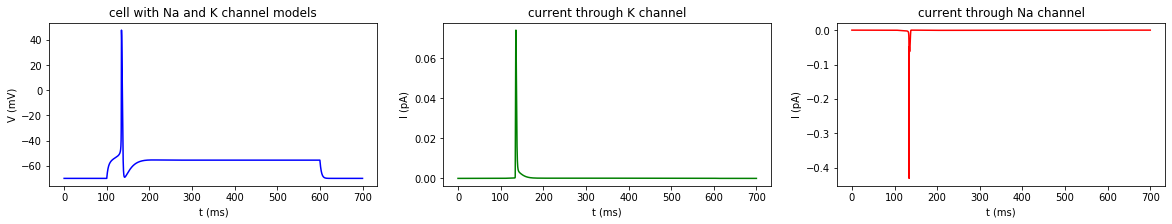

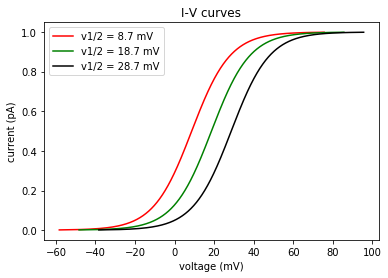

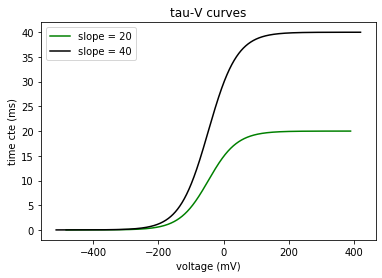

In [1]:
# This will compile the mechanisms inside the MOD files (and create a new folder x86_64/special).
! nrnivmodl

from neuron import h
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Create a section 
soma = h.Section(name='soma')
soma.L = 18.0     # length (µm)
soma.diam = 18.0  # diameter (µm)
soma.Ra = 123.0   # axial resistivity (Ω*cm)
soma.cm = 1.0       # capacitance (µF/cm^2)
soma.nseg = 1


# Insert passive properties
soma.insert('pas')
for seg in soma:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70   # Leak reversal potential, it influences the steady state membrane potential

# INSERT MODELS
soma.insert('K_Ch') ######## This channel dynamic desciption is in K_channel_change_mInf.mod
for seg in soma:
    seg.gKv3bar_K_Ch = 0.01   # Maximal conductance of the potassium channels

soma.insert('Na_Ch')
for seg in soma:
    seg.gNa_Sbar_Na_Ch = 0.09   # Maximal conductance of the sodium channels
    


# Inject a current step into the soma
stim = h.IClamp(soma(0.5))         # Place a stimulation electrode in the middle of the soma
stim.delay = 100   # stim delay (ms)
stim.amp = 0.04    # stim amplitude (pA)
stim.dur = 500     # stim duration (ms)


# Initialize NEURON vectors to record time, voltage and current
# time vector
rec_t = h.Vector()
rec_t.record(h._ref_t)
# membrame potential vector
rec_v = h.Vector()
rec_v.record(soma(0.5)._ref_v)

# Na current
rec_iNa = h.Vector()
rec_iNa.record(soma(0.5)._ref_ina)
# K current
rec_iK = h.Vector()
rec_iK.record(soma(0.5)._ref_ik)


# Initialize and run a simulation
h.load_file('stdrun.hoc')
h.finitialize(-70)    # initial voltage 
h.continuerun(700)    # total recording duration



# See the voltage curves
fig = plt.figure(figsize=(20,3))
plt.subplot(131)
plt.title('cell with Na and K channel models')
plt.ylabel('V (mV)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_v, 'b')

plt.subplot(132)
plt.title('current through K channel')
plt.ylabel('I (pA)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_iK, 'g')

plt.subplot(133)
plt.title('current through Na channel')
plt.ylabel('I (pA)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_iNa, 'r')



### See the I-V curves

# v_half = 8.7 mV
I3 = np.arange(0, 1.0, 0.001)
V3 = []
for i3 in I3:
    v3 = 8.7 - 9.7*np.log((1/i3)-1)
    V3.append(v3)

# v_half = 18.7 mV
I1 = np.arange(0, 1.0, 0.001)
V1 = []
for i1 in I1:
    v1 = 18.7 - 9.7*np.log((1/i1)-1)
    V1.append(v1)


# v_half = 28.7 mV
I2 = np.arange(0, 1.0, 0.001)
V2 = []
for i2 in I2:
    v2 = 28.7 - 9.7*np.log((1/i2)-1)
    V2.append(v2)

plt.figure()
plt.xlabel('voltage (mV)')
plt.ylabel('current (pA)')
plt.plot(V3, I3, 'r', label='v1/2 = 8.7 mV')
plt.plot(V1, I1, 'g', label='v1/2 = 18.7 mV')
plt.plot(V2, I2, 'k',label='v1/2 = 28.7 mV')
plt.title("I-V curves")
plt.legend()


### See the Tau-V curves

import numpy as np

# slope = 20.0 ms
Tau1 = np.arange(0, 100.0, 0.001)
V1 = []
for t1 in Tau1:
    v1 = -46.56 + (-44.10*np.log((20/t1)-1))
    V1.append(v1)

# slope = 40 ms
Tau2 = np.arange(0, 100.0, 0.001)
V2 = []
for t2 in Tau2:
    v2 = -46.56 + (-44.10*np.log((40/t2)-1))
    V2.append(v2)

plt.figure()
plt.xlabel('voltage (mV)')
plt.ylabel('time cte (ms)')
plt.plot(V1, Tau1, 'g', label='slope = 20')
plt.plot(V2, Tau2, 'k',label='slope = 40')
plt.title("tau-V curves")
plt.legend()

<font size = "3">1 - a.

<font size = "3">2 - V_half is the voltage at half-maximal activation.
 
<font size = "3">3 - b.
